In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [2]:
path =r'C:/Users/mjc341/desktop/UMAN 1625 A-B testingBaysean/SF_email_reports'
filenames = glob.glob(path + "/*.csv")

In [3]:
#create a list of filenames from the reports
EM_Results = []
for filename in filenames:
    EM_Results.append(filename[70:])

In [4]:
EM_Results

['Career_Ctr.csv',
 'COE_Welcome_ltr.csv',
 'Frost_welcome_ltr.csv',
 'MBS_REG_remind.csv',
 'MBS_Welcome_ltr.csv',
 'Outcomes_Values_of_UM.csv',
 'Quest_abt_Money.csv',
 'Registra_open_9.csv',
 'Registra_open_9b.csv',
 'Reg_reminder.csv',
 'Resgistration_timeline.csv',
 'SchoolofCOM_reg_remind.csv',
 'SchoolofCOM_Welcome_ltr.csv',
 'Summer_webinar.csv',
 'UGED_Welcome_ltr.csv']

In [5]:
#test the path
path

'C:/Users/mjc341/desktop/UMAN 1625 A-B testingBaysean/SF_email_reports'

In [6]:
#create a function that reads the csv files and extract the email header
import csv
def subjectline(i):
    file = open(path + "/"+ i,'r')
    csvreader=csv.reader(file)
    header = next(csvreader)
    #print(header)
    line2 =next(csvreader)
    #print(line2)
    SUBJ=line2[7]
    NameofEmail = i[:-4]
    return ["The subject line used in " + NameofEmail+ " was " + SUBJ]


In [7]:
#test the function
i='Career_Ctr.csv'

In [8]:
subjectline(i)

['The subject line used in Career_Ctr was Discover and explore careers with Toppel Career Center']

In [9]:
#loop through the list and apply the function
HDRS= []
for item in EM_Results:
    HDRS.append(subjectline(item))
HDRS

[['The subject line used in Career_Ctr was Discover and explore careers with Toppel Career Center'],
 ['The subject line used in COE_Welcome_ltr was A message from the assistant dean'],
 ['The subject line used in Frost_welcome_ltr was A message from the Frost School of Music'],
 ['The subject line used in MBS_REG_remind was Registration closes July 9'],
 ['The subject line used in MBS_Welcome_ltr was Welcome to the Miami Business School'],
 ['The subject line used in Outcomes_Values_of_UM was Experience the value of a UM education'],
 ['The subject line used in Quest_abt_Money was Student account resources'],
 ['The subject line used in Registra_open_9 was It?s time to register for courses!'],
 ['The subject line used in Registra_open_9b was It?s time to register for courses!'],
 ['The subject line used in Reg_reminder was You still need to register for classes'],
 ['The subject line used in Resgistration_timeline was Learn next steps about your course registration process'],
 ['The s

In [10]:
#create a function that opens the file and calculates the stats of the email response

In [11]:
def DROP_RATE(dr):
    name = pd.read_csv(path + "/"+ dr, skiprows=3, engine='python', index_col=False)
    name = name [['IntervalStartTime','Sent','Bounced', 'UniqueOpened','UniqueClicked','Unsubscribed']]
    TSent = name['Sent'].sum()
    TOpen= name['UniqueOpened'].sum()
    TUnsubsc= name['Unsubscribed'].sum()
    TClick= name['UniqueClicked'].sum()
    name['IntervalStartTime'] = pd.to_datetime(name.IntervalStartTime)
    NameofFile = ["The Stats for " + dr[:-4] + " are as follows:"]
    Stats = ["Total Emails Sent:"+ str(TSent),"Total Unique Opened: "+ str(TOpen),"Total Unsubscribed: "+ str(TUnsubsc),"Total Unique Clicks: "+str(TClick)]
    return [NameofFile,Stats]

In [12]:
#test the function
dr = 'Career_Ctr.csv'

In [13]:
DROP_RATE(dr)

[['The Stats for Career_Ctr are as follows:'],
 ['Total Emails Sent:2947',
  'Total Unique Opened: 1404',
  'Total Unsubscribed: 0',
  'Total Unique Clicks: 257']]

In [14]:
#here are the full results in a format good for a word doc only but not good for visualization
ES = []
for item in EM_Results:
    ES.append(DROP_RATE(item))
ES

[[['The Stats for Career_Ctr are as follows:'],
  ['Total Emails Sent:2947',
   'Total Unique Opened: 1404',
   'Total Unsubscribed: 0',
   'Total Unique Clicks: 257']],
 [['The Stats for COE_Welcome_ltr are as follows:'],
  ['Total Emails Sent:30',
   'Total Unique Opened: 17',
   'Total Unsubscribed: 0',
   'Total Unique Clicks: 10']],
 [['The Stats for Frost_welcome_ltr are as follows:'],
  ['Total Emails Sent:147',
   'Total Unique Opened: 126',
   'Total Unsubscribed: 0',
   'Total Unique Clicks: 23']],
 [['The Stats for MBS_REG_remind are as follows:'],
  ['Total Emails Sent:64',
   'Total Unique Opened: 33',
   'Total Unsubscribed: 0',
   'Total Unique Clicks: 7']],
 [['The Stats for MBS_Welcome_ltr are as follows:'],
  ['Total Emails Sent:585',
   'Total Unique Opened: 363',
   'Total Unsubscribed: 0',
   'Total Unique Clicks: 36']],
 [['The Stats for Outcomes_Values_of_UM are as follows:'],
  ['Total Emails Sent:2974',
   'Total Unique Opened: 1705',
   'Total Unsubscribed: 1'

In [15]:
#for analysis I need to put the actual numbers into the dataframe
def DROP_RATE_STATS(dr):
    name = pd.read_csv(path + "/"+ dr, skiprows=3, engine='python', index_col=False)
    name = name [['IntervalStartTime','Sent','Bounced', 'UniqueOpened','UniqueClicked','Unsubscribed']]
    TSent = name['Sent'].sum()
    TOpen= name['UniqueOpened'].sum()
    TUnsubsc= name['Unsubscribed'].sum()
    TClick= name['UniqueClicked'].sum()
    TBounce= name['Bounced'].sum()
    name['IntervalStartTime'] = pd.to_datetime(name.IntervalStartTime)
    NameofFile = dr[:-4]
    Stats = [TSent,TOpen,TUnsubsc,TClick,TBounce]
    return [NameofFile, Stats]

In [16]:
#this will create a nested list of the email name and the stats
ESTAT = []
for item in EM_Results:
    ESTAT.append(DROP_RATE_STATS(item))
ESTAT

[['Career_Ctr', [2947, 1404, 0, 257, 3]],
 ['COE_Welcome_ltr', [30, 17, 0, 10, 1]],
 ['Frost_welcome_ltr', [147, 126, 0, 23, 0]],
 ['MBS_REG_remind', [64, 33, 0, 7, 2]],
 ['MBS_Welcome_ltr', [585, 363, 0, 36, 0]],
 ['Outcomes_Values_of_UM', [2974, 1705, 1, 101, 48]],
 ['Quest_abt_Money', [2953, 1777, 0, 229, 45]],
 ['Registra_open_9', [11, 6, 0, 1, 0]],
 ['Registra_open_9b', [2537, 1688, 0, 353, 4]],
 ['Reg_reminder', [527, 286, 0, 59, 4]],
 ['Resgistration_timeline', [2234, 1647, 0, 281, 1]],
 ['SchoolofCOM_reg_remind', [25, 8, 0, 2, 1]],
 ['SchoolofCOM_Welcome_ltr', [168, 117, 0, 20, 0]],
 ['Summer_webinar', [2851, 1589, 1, 178, 17]],
 ['UGED_Welcome_ltr', [11, 11, 0, 0, 0]]]

In [17]:
#had to resolve the issue of the list of lists that was produced by the functions answer is to FLATTEN the nested list
#tried many flatten functions this one was the only one that worked and I could put it into a for loop
def lflatten(TheList):
    listIsNested = True

    while listIsNested:                 #outer loop
        keepChecking = False
        Temp = []

        for element in TheList:         #inner loop
            if isinstance(element,list):
                Temp.extend(element)
                keepChecking = True
            else:
                Temp.append(element)

        listIsNested = keepChecking     #determine if outer loop exits
        TheList = Temp[:]

    return TheList

In [18]:
#test the function
x = ['Career_Ctr', [2947, 1404, 0, 257]]

In [19]:
print(list(lflatten(x)))

['Career_Ctr', 2947, 1404, 0, 257]


In [20]:
#put the function into the loop for the results
Flat_ESTAT = []
for item in ESTAT:
    Flat_ESTAT.append(lflatten(item))
Flat_ESTAT

[['Career_Ctr', 2947, 1404, 0, 257, 3],
 ['COE_Welcome_ltr', 30, 17, 0, 10, 1],
 ['Frost_welcome_ltr', 147, 126, 0, 23, 0],
 ['MBS_REG_remind', 64, 33, 0, 7, 2],
 ['MBS_Welcome_ltr', 585, 363, 0, 36, 0],
 ['Outcomes_Values_of_UM', 2974, 1705, 1, 101, 48],
 ['Quest_abt_Money', 2953, 1777, 0, 229, 45],
 ['Registra_open_9', 11, 6, 0, 1, 0],
 ['Registra_open_9b', 2537, 1688, 0, 353, 4],
 ['Reg_reminder', 527, 286, 0, 59, 4],
 ['Resgistration_timeline', 2234, 1647, 0, 281, 1],
 ['SchoolofCOM_reg_remind', 25, 8, 0, 2, 1],
 ['SchoolofCOM_Welcome_ltr', 168, 117, 0, 20, 0],
 ['Summer_webinar', 2851, 1589, 1, 178, 17],
 ['UGED_Welcome_ltr', 11, 11, 0, 0, 0]]

In [21]:
#now I can create a dataframe
dfESTAT = pd.DataFrame(Flat_ESTAT[0:],columns = ['EmailName','Sent','Open','Unsub','Click','Bounce'])

In [22]:
dfESTAT

,EmailName,Sent,Open,Unsub,Click,Bounce
0,Career_Ctr,2947,1404,0,257,3
1,COE_Welcome_ltr,30,17,0,10,1
2,Frost_welcome_ltr,147,126,0,23,0
3,MBS_REG_remind,64,33,0,7,2
4,MBS_Welcome_ltr,585,363,0,36,0
5,Outcomes_Values_of_UM,2974,1705,1,101,48
6,Quest_abt_Money,2953,1777,0,229,45
7,Registra_open_9,11,6,0,1,0
8,Registra_open_9b,2537,1688,0,353,4
9,Reg_reminder,527,286,0,59,4


In [23]:
# I will create a dataframe with the email header and merge it with the stats df
def subjectlineRAW(i):
    file = open(path + "/"+ i,'r')
    csvreader=csv.reader(file)
    header = next(csvreader)
    #print(header)
    line2 =next(csvreader)
    #print(line2)
    SUBJ=line2[7]
    NameofEmail = i[:-4]
    return [NameofEmail, SUBJ]

In [24]:
RAW_HDRS= []
for item in EM_Results:
    RAW_HDRS.append(subjectlineRAW(item))
RAW_HDRS

[['Career_Ctr', 'Discover and explore careers with Toppel Career Center'],
 ['COE_Welcome_ltr', 'A message from the assistant dean'],
 ['Frost_welcome_ltr', 'A message from the Frost School of Music'],
 ['MBS_REG_remind', 'Registration closes July 9'],
 ['MBS_Welcome_ltr', 'Welcome to the Miami Business School'],
 ['Outcomes_Values_of_UM', 'Experience the value of a UM education'],
 ['Quest_abt_Money', 'Student account resources'],
 ['Registra_open_9', 'It?s time to register for courses!'],
 ['Registra_open_9b', 'It?s time to register for courses!'],
 ['Reg_reminder', 'You still need to register for classes'],
 ['Resgistration_timeline',
  'Learn next steps about your course registration process'],
 ['SchoolofCOM_reg_remind', 'Registration closes July 9'],
 ['SchoolofCOM_Welcome_ltr',
  'A welcome from the vice dean of academic affairs'],
 ['Summer_webinar', 'Join us for our Summer Webinar Series'],
 ['UGED_Welcome_ltr',
  'Welcome to the School of Education and Human Development']]

In [25]:
Header = pd.DataFrame(RAW_HDRS[0:],columns = ['EmailName','Header'])

In [26]:
Header.head(2)

,EmailName,Header
0,Career_Ctr,Discover and explore careers with Toppel Caree...
1,COE_Welcome_ltr,A message from the assistant dean


In [27]:
COMBOResults = pd.merge(Header,dfESTAT, on ='EmailName', how = 'outer')

In [28]:
COMBOResults

,EmailName,Header,Sent,Open,Unsub,Click,Bounce
0,Career_Ctr,Discover and explore careers with Toppel Caree...,2947,1404,0,257,3
1,COE_Welcome_ltr,A message from the assistant dean,30,17,0,10,1
2,Frost_welcome_ltr,A message from the Frost School of Music,147,126,0,23,0
3,MBS_REG_remind,Registration closes July 9,64,33,0,7,2
4,MBS_Welcome_ltr,Welcome to the Miami Business School,585,363,0,36,0
5,Outcomes_Values_of_UM,Experience the value of a UM education,2974,1705,1,101,48
6,Quest_abt_Money,Student account resources,2953,1777,0,229,45
7,Registra_open_9,It?s time to register for courses!,11,6,0,1,0
8,Registra_open_9b,It?s time to register for courses!,2537,1688,0,353,4
9,Reg_reminder,You still need to register for classes,527,286,0,59,4


In [29]:
#add open rate and click rate as percentages

In [30]:
COMBOResults['SentMinusBounce']= pd.eval(COMBOResults.Sent-COMBOResults.Bounce)

In [31]:
COMBOResults['OpenRate']= pd.eval(COMBOResults.Open/COMBOResults.SentMinusBounce)

In [32]:
COMBOResults['ClickRate']= pd.eval(COMBOResults.Click/COMBOResults.Open)

In [33]:
COMBOResults['Open%']= COMBOResults['OpenRate'].map(lambda n: '{:,.1%}'.format(n))

In [34]:
COMBOResults['Click%']= COMBOResults['ClickRate'].map(lambda n: '{:,.1%}'.format(n))

In [35]:
COMBOResults

,EmailName,Header,Sent,Open,Unsub,Click,Bounce,SentMinusBounce,OpenRate,ClickRate,Open%,Click%
0,Career_Ctr,Discover and explore careers with Toppel Caree...,2947,1404,0,257,3,2944,0.476902,0.183048,47.7%,18.3%
1,COE_Welcome_ltr,A message from the assistant dean,30,17,0,10,1,29,0.586207,0.588235,58.6%,58.8%
2,Frost_welcome_ltr,A message from the Frost School of Music,147,126,0,23,0,147,0.857143,0.18254,85.7%,18.3%
3,MBS_REG_remind,Registration closes July 9,64,33,0,7,2,62,0.532258,0.212121,53.2%,21.2%
4,MBS_Welcome_ltr,Welcome to the Miami Business School,585,363,0,36,0,585,0.620513,0.0991736,62.1%,9.9%
5,Outcomes_Values_of_UM,Experience the value of a UM education,2974,1705,1,101,48,2926,0.582707,0.0592375,58.3%,5.9%
6,Quest_abt_Money,Student account resources,2953,1777,0,229,45,2908,0.611073,0.128869,61.1%,12.9%
7,Registra_open_9,It?s time to register for courses!,11,6,0,1,0,11,0.545455,0.166667,54.5%,16.7%
8,Registra_open_9b,It?s time to register for courses!,2537,1688,0,353,4,2533,0.666403,0.209123,66.6%,20.9%
9,Reg_reminder,You still need to register for classes,527,286,0,59,4,523,0.546845,0.206294,54.7%,20.6%


In [36]:
COMBOResults['OpenRate']= pd.to_numeric(COMBOResults['OpenRate'])
COMBOResults['ClickRate']= pd.to_numeric(COMBOResults['ClickRate'])
#Create columns that are plottable you have to remove the % sign you just had added
COMBOResults['Open%Plot']= COMBOResults['Open%'].str.rstrip('%').astype('float') 
COMBOResults['Click%Plot']= COMBOResults['Click%'].str.rstrip('%').astype('float')

In [37]:
COMBOResults.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Data columns (total 14 columns):
EmailName          15 non-null object
Header             15 non-null object
Sent               15 non-null int64
Open               15 non-null int64
Unsub              15 non-null int64
Click              15 non-null int64
Bounce             15 non-null int64
SentMinusBounce    15 non-null object
OpenRate           15 non-null float64
ClickRate          15 non-null float64
Open%              15 non-null object
Click%             15 non-null object
Open%Plot          15 non-null float64
Click%Plot         15 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.8+ KB


In [38]:
COMBOResults

,EmailName,Header,Sent,Open,Unsub,Click,Bounce,SentMinusBounce,OpenRate,ClickRate,Open%,Click%,Open%Plot,Click%Plot
0,Career_Ctr,Discover and explore careers with Toppel Caree...,2947,1404,0,257,3,2944,0.476902,0.183048,47.7%,18.3%,47.7,18.3
1,COE_Welcome_ltr,A message from the assistant dean,30,17,0,10,1,29,0.586207,0.588235,58.6%,58.8%,58.6,58.8
2,Frost_welcome_ltr,A message from the Frost School of Music,147,126,0,23,0,147,0.857143,0.182540,85.7%,18.3%,85.7,18.3
3,MBS_REG_remind,Registration closes July 9,64,33,0,7,2,62,0.532258,0.212121,53.2%,21.2%,53.2,21.2
4,MBS_Welcome_ltr,Welcome to the Miami Business School,585,363,0,36,0,585,0.620513,0.099174,62.1%,9.9%,62.1,9.9
5,Outcomes_Values_of_UM,Experience the value of a UM education,2974,1705,1,101,48,2926,0.582707,0.059238,58.3%,5.9%,58.3,5.9
6,Quest_abt_Money,Student account resources,2953,1777,0,229,45,2908,0.611073,0.128869,61.1%,12.9%,61.1,12.9
7,Registra_open_9,It?s time to register for courses!,11,6,0,1,0,11,0.545455,0.166667,54.5%,16.7%,54.5,16.7
8,Registra_open_9b,It?s time to register for courses!,2537,1688,0,353,4,2533,0.666403,0.209123,66.6%,20.9%,66.6,20.9
9,Reg_reminder,You still need to register for classes,527,286,0,59,4,523,0.546845,0.206294,54.7%,20.6%,54.7,20.6


Text(0,0.5,'Email Name')

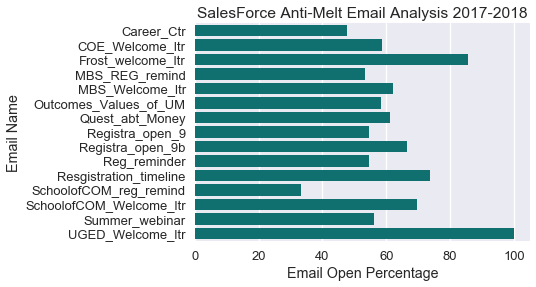

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('talk')
color = sns.color_palette("Dark2",6)
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1 = sns.barplot(y ='EmailName', x= 'Open%Plot', data = COMBOResults, color = "teal")
ax1.set(title = 'SalesForce Anti-Melt Email Analysis 2017-2018')
ax1.set_xlabel('Email Open Percentage')
ax1.set_ylabel('Email Name')
#ax.legend(loc= 'best')


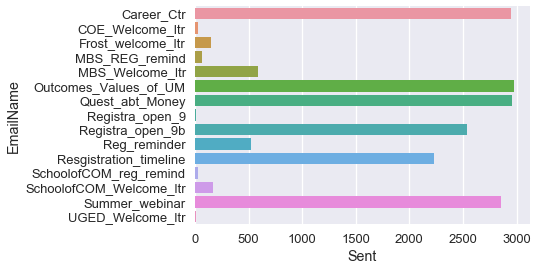

In [40]:
ax = sns.barplot(y ='EmailName', x= 'Sent', data = COMBOResults)


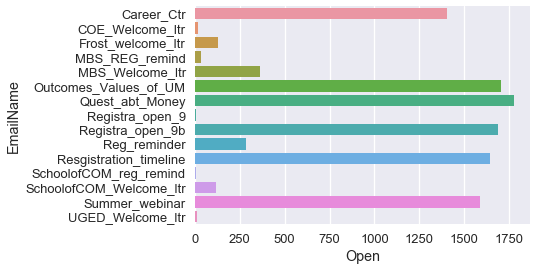

In [41]:
ax2 =sns.barplot(y ='EmailName', x= 'Open', data = COMBOResults)

In [46]:
#ax3 =sns.barplot(y ='EmailName', x= 'Open%Plot', data = COMBOResults)

In [47]:
#ax4 =sns.barplot(y ='EmailName', x= 'Click%Plot', data = COMBOResults)

In [44]:
#MBS_Welcome['IntervalStartTime'] = pd.to_datetime(MBS_Welcome.IntervalStartTime)

In [45]:
#ax = MBS_Welcome.plot(x="IntervalStartTime", y = 'UniqueOpened')
#ax2 = MBS_Welcome.plot(x="IntervalStartTime", y = 'UniqueClicked', color ='r')

In [52]:
#Create a function that retrieves the Email Interest Rate
def READ_RATE(dt):
    name = pd.read_csv(path + "/"+ dr, skiprows=3, engine='python', index_col=False)
    name = name [['IntervalStartTime','UniqueOpened']]
    Open = name['UniqueOpened'].sum()
    name['IntervalStartTime'] = pd.to_datetime(name.IntervalStartTime)
    NameofFile = dr[:-4] 
    Stats = [Open]
    return [NameofFile,Stats]

In [53]:
dt = 'Career_Ctr.csv'

In [54]:
READ_RATE(dt)

['Career_Ctr', [1404]]

In [91]:
def READ_RATEdf(dr):
    name = pd.read_csv(path + "/"+ dr, skiprows=3, engine='python', index_col=False)
    name = name [['IntervalStartTime','UniqueOpened']]
    df = pd.DataFrame(name)
    name['IntervalStartTime'] = pd.to_datetime(name.IntervalStartTime)
    NameofFile = dr[:-4]
    return (df)

In [92]:
dr = 'Career_Ctr.csv'

In [93]:
df1 = READ_RATEdf(dr)

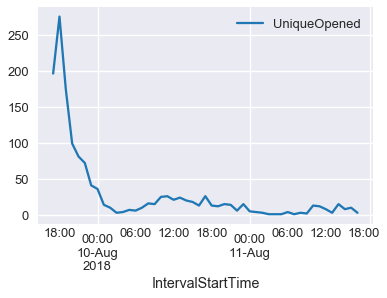

In [95]:
df1.plot(x="IntervalStartTime", y = 'UniqueOpened')